<h5> Linking fwd and bwd simulations </h5>

* simulate site under divergent selection using SLiM 3.3 (without bothering about neutral mutations)
* this results in a .trees (treesequence) file
* recapitate (=add neutral dynamics to make sure all individuals you sample share one common ancestor) .trees by loading it using pyslim and msprime
* sprinkle neutral mutations along the treesequence
* analyse .trees file using tskit (or spit out a .vcf and use GiMBL)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pyslim, msprime
import pandas as pd

<h5> parameters </h5>

* migration rate = 3.8866e-7
* seqence length = 32e3  
sequence the size of one window
* recombination rate = 1.84675e-8
* Ne = 2.3241e6 
Cydno = ancestral
* Ne derived = 9.8922e5 
Mel_rosina = derived
* split time = 4.8580e6
* mutation rate = 1.9e-9

In [8]:
#scaled rates
recombination_rate = 1.84675e-5
Ne = 2324
mutation_rate = 2.9e-6

<h5> sequence of events within SLiM script </h5>

* Simulation starts right before split
* A mutation m1 is present within the starting population at a certain base frequency
* At the time of the split, this previously neutral mutation now becomes beneficial in the derived population, but is still neutral in the original population (this can be adapted of course)
* Ne, Ne_derived, recr, mu and total runtime are scaled by a factor 1000

In [ ]:
!slim sim_fwd.txt

<h5> recapitate .trees </h5>

In [14]:
ts = pyslim.load('sim_fwd.trees')
#recapitation
# all individuals are already in one ancestral population (split was modelled in SLiM) so no need to
# specify a population configuration
ts.recapitate(recombination_rate=recombination_rate, Ne=Ne)

#draw random sample of individuals
samplesize = 20
subsample = ts.get_samples(samplesize)
ts_simple= ts.simplify(subsample)
ts_simple.dump('recap_simplified_sim.trees')

#add neutral mutations
muts_ts = pyslim.SlimTreeSequence(msprime.mutate(ts_simple, rate=mutation_rate, keep=True))
#output vcf
with open('sim.vcf', 'w') as vcf_file:
            ts_simple.write_vcf(vcf_file, ploidy=2)

<h5> analyse .trees </h5>

In [2]:
slm_fwd = pd.read_csv('slm_fwd.csv', index_col=0)
slm_fwd_long = pd.read_csv('../SLiM/sim_fwd_1Mb.csv')

(0, 0.6)

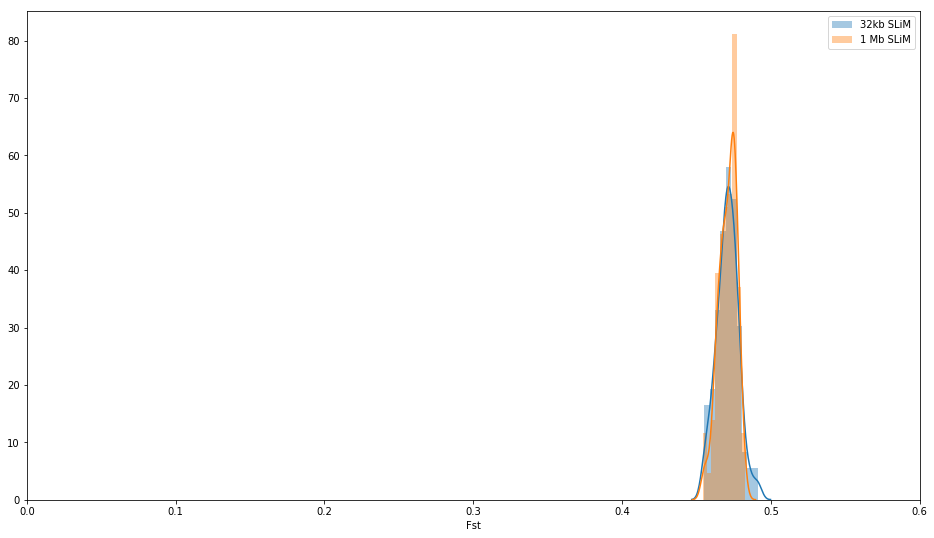

In [3]:
fig, ax = plt.subplots(figsize=(16,9))
sns.distplot(slm_fwd['Fst'], label='32kb SLiM', norm_hist=True)
sns.distplot(slm_fwd_long['Fst'], label='1 Mb SLiM', norm_hist=True) #?????
plt.legend()
ax.set_xlim((0, 0.6))

(0, 0.6)

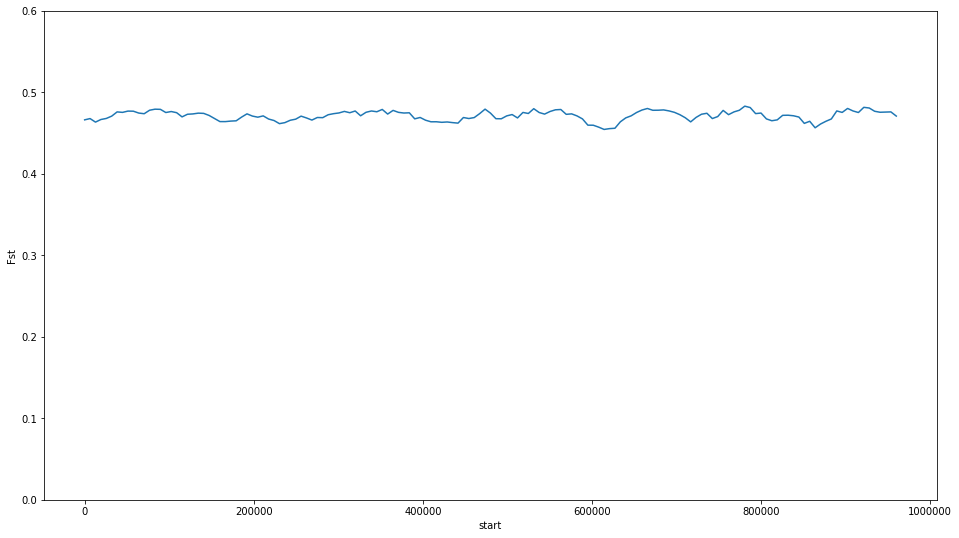

In [4]:
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(slm_fwd_long['start'], slm_fwd_long['Fst'])
ax.set_ylim((0,0.6))